### pip 설치
+ pip install nltk
+ pip install konlpy
    - import konlpy 시 오류 attributeerror: module 'tweepy' has no attribute 'streamlistener'
    - tweepy 버전이 3.x.x 이어야 함.
    - pip install tweepy==3.10.0
+ pip install jpype1 Jpype1-py3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gooreview.csv', encoding='UTF-8')

In [3]:
df.head()

,날짜,리뷰 내용,평점(5개 만점)
0,2021년 10월,아침 일찍 와도 주차장이 여유롭지 않지만 여러가지 기구들도 많고 아이들과 놀기 너무...,5.0
1,2021년 10월,"아이들이 좋아하고, 재있어요",5.0
2,2021년 10월,가족들과 즐건주말 위드코로나되면 더북적북적 해지겠지?,5.0
3,2021년 10월,오후4시에 들어가서 밤 9시 30분까지 알차게 놀았어요^^ 엄청 혼잡하긴 했지만 거...,5.0
4,2021년 10월,"유아, 어린이가 놀기에 최고의 놀이공원~",5.0


In [4]:
# 데이터 셋 확인
df.columns = ['date','text','rating']

In [5]:
# 결측치 값 처리하기
df.isnull().sum()

date       0
text      10
rating    11
dtype: int64

In [6]:
df = df[df['text'].notnull()]
df = df[df['rating'].notnull()]

In [7]:
# 결측치 값 처리하기
df.isnull().sum()

date      0
text      0
rating    0
dtype: int64

In [8]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    229 non-null    object 
 1   text    229 non-null    object 
 2   rating  229 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [9]:
# 데이터 변수 확인
df['text']

0      아침 일찍 와도 주차장이 여유롭지 않지만 여러가지 기구들도 많고 아이들과 놀기 너무...
1                                        아이들이 좋아하고, 재있어요
2                          가족들과 즐건주말 위드코로나되면 더북적북적 해지겠지?
3      오후4시에 들어가서 밤 9시 30분까지 알차게 놀았어요^^ 엄청 혼잡하긴 했지만 거...
4                                 유아, 어린이가 놀기에 최고의 놀이공원~
                             ...                        
234                     가볍게 다녀오기 좋습니다.\r\n버스킹이 활발해서 좋았어요
235                        아아들 놀기에 좋지만 중간중간 쉴공간이 조금 부족한듯
236    서울랜드는 아이들 및 유아들이 놀기에 좋다 어른들은 탈게 그리많지 않다.\r\n아이...
238                                  크레페 넘 맛있어요 스페로스페라최고
239    언제나 즐겁습니다.\r\n길 중간중간에 있는 간식 코너가 많아서 좋아요.\r\n핫도...
Name: text, Length: 229, dtype: object

In [10]:
df['text'][100]

'주말이라 그런가 대기 시간도 길고 사람도 엄청 많아요'

In [11]:
# 정규 표현식 함수 정의
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [12]:
# 기존 데이터
df['text'][0]

'아침 일찍 와도 주차장이 여유롭지 않지만 여러가지 기구들도 많고 아이들과 놀기 너무 좋습니다. 맛있는 레스토랑 이라고 하긴 어렵지만 돈까스, 우동 등 그냥 무난한 식당들도 좋습니다. 끼어들기에 대해서 조금 더 엄격히 감독했으면 하는 바램입니다..'

In [13]:
# 정규식 표현 적용 후 데이터
apply_regular_expression(df['text'][0])

'아침 일찍 와도 주차장이 여유롭지 않지만 여러가지 기구들도 많고 아이들과 놀기 너무 좋습니다 맛있는 레스토랑 이라고 하긴 어렵지만 돈까스 우동 등 그냥 무난한 식당들도 좋습니다 끼어들기에 대해서 조금 더 엄격히 감독했으면 하는 바램입니다'

In [14]:
# 한국어 행태소 명사 단위 
from konlpy.tag import Okt
from collections import Counter

In [15]:
apply_regular_expression(df['text'][0])

'아침 일찍 와도 주차장이 여유롭지 않지만 여러가지 기구들도 많고 아이들과 놀기 너무 좋습니다 맛있는 레스토랑 이라고 하긴 어렵지만 돈까스 우동 등 그냥 무난한 식당들도 좋습니다 끼어들기에 대해서 조금 더 엄격히 감독했으면 하는 바램입니다'

In [16]:
okt = Okt()  # 명사 형태소 추출 함}수
nouns = okt.nouns(apply_regular_expression(df['text'][0]))
nouns

['아침',
 '일찍',
 '주차장',
 '여러가지',
 '기구',
 '아이',
 '레스토랑',
 '돈까스',
 '우동',
 '등',
 '그냥',
 '무난',
 '식당',
 '대해',
 '조금',
 '더',
 '감독',
 '바램']

In [17]:
# 말뭉치 생성
#dft = df.iloc[:,1].tolist()
#sdft = str(dft)
corpus = "".join(df['text'].tolist())
corpus

"아침 일찍 와도 주차장이 여유롭지 않지만 여러가지 기구들도 많고 아이들과 놀기 너무 좋습니다. 맛있는 레스토랑 이라고 하긴 어렵지만 돈까스, 우동 등 그냥 무난한 식당들도 좋습니다. 끼어들기에 대해서 조금 더 엄격히 감독했으면 하는 바램입니다..아이들이 좋아하고, 재있어요가족들과 즐건주말 위드코로나되면 더북적북적 해지겠지?오후4시에 들어가서 밤 9시 30분까지 알차게 놀았어요^^ 엄청 혼잡하긴 했지만 거의 모든 놀이기구가 운행되니까 새롭기도하고 재밌었어요~유아, 어린이가 놀기에 최고의 놀이공원~가을은 서울랜드.\r\n근데 밤에는 좀 쌀쌀하네요\r\n40년 가까이 되었는데도\r\n몇몇은 그대로 네요\r\n주막집에서 떡뽁이는 절대먹지말것.\r\n내 생의 최악의 맛.놀이기구를 타는 맛에 재미있고, 즐겁고, 축제나 행사, 버스킹을 보다보면 하루가 총알같이 가버린다. 줄서는 것에도 하루 중 시간이 투입된다는 게 함정.아이와 함께다녀왔는데 아이들을 위한 놀이시설이 있어 좋았습니다.넓은 면적에 각종 이벤트가 많고 코로나 시기에 적합한 놀이 공원 같아요.동문원도 미술관도같이있답니다.지하철로도 이용가능서울랜드 역사도 오래됐고 저는 30대인데 어렸을때 부터 갔던곳이라 추억이 많은 곳이예요. 결혼해서 아이들 데리고 오니 기분이 더 새롭더라고요.좀 늦은시각에 두시이후에\r\n놀이 시설을 이용하는데\r\n많이 기다리지 않아 좋았어요\r\n\r\n편의시설들도 깨끗하고\r\n청결했습니다 맛있는것들도\r\n많았구요ㅎ탑승안되는 놀이기구가 많아서 초등자녀가 실망을 많이 함(Google 번역 제공) 국내 최초의 놀이동산인 서울랜드 테마파크로 들어오세요. 재미있는 놀이기구를 즐기고 경품을 쟁취하기 위해 경쟁하십시오. 서울대공원을 방문하여 300종 이상의 다양한 동물을 가까이서 관찰해 보세요. 모든 연령대의 여행자에게 적합한 가족 친화적인 관광 허브에서 즐거운 시간을 보내세요.탈 것도 많고 사진찍을 곳도 많아 좋습니다.재밌게 공연도 좋았습니다\r\n다만 최근 코로나 때문인지 무엇때문인지는 모르지

In [18]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'아침 일찍 와도 주차장이 여유롭지 않지만 여러가지 기구들도 많고 아이들과 놀기 너무 좋습니다 맛있는 레스토랑 이라고 하긴 어렵지만 돈까스 우동 등 그냥 무난한 식당들도 좋습니다 끼어들기에 대해서 조금 더 엄격히 감독했으면 하는 바램입니다아이들이 좋아하고 재있어요가족들과 즐건주말 위드코로나되면 더북적북적 해지겠지오후시에 들어가서 밤 시 분까지 알차게 놀았어요 엄청 혼잡하긴 했지만 거의 모든 놀이기구가 운행되니까 새롭기도하고 재밌었어요유아 어린이가 놀기에 최고의 놀이공원가을은 서울랜드근데 밤에는 좀 쌀쌀하네요년 가까이 되었는데도몇몇은 그대로 네요주막집에서 떡뽁이는 절대먹지말것내 생의 최악의 맛놀이기구를 타는 맛에 재미있고 즐겁고 축제나 행사 버스킹을 보다보면 하루가 총알같이 가버린다 줄서는 것에도 하루 중 시간이 투입된다는 게 함정아이와 함께다녀왔는데 아이들을 위한 놀이시설이 있어 좋았습니다넓은 면적에 각종 이벤트가 많고 코로나 시기에 적합한 놀이 공원 같아요동문원도 미술관도같이있답니다지하철로도 이용가능서울랜드 역사도 오래됐고 저는 대인데 어렸을때 부터 갔던곳이라 추억이 많은 곳이예요 결혼해서 아이들 데리고 오니 기분이 더 새롭더라고요좀 늦은시각에 두시이후에놀이 시설을 이용하는데많이 기다리지 않아 좋았어요편의시설들도 깨끗하고청결했습니다 맛있는것들도많았구요ㅎ탑승안되는 놀이기구가 많아서 초등자녀가 실망을 많이 함 번역 제공 국내 최초의 놀이동산인 서울랜드 테마파크로 들어오세요 재미있는 놀이기구를 즐기고 경품을 쟁취하기 위해 경쟁하십시오 서울대공원을 방문하여 종 이상의 다양한 동물을 가까이서 관찰해 보세요 모든 연령대의 여행자에게 적합한 가족 친화적인 관광 허브에서 즐거운 시간을 보내세요탈 것도 많고 사진찍을 곳도 많아 좋습니다재밌게 공연도 좋았습니다다만 최근 코로나 때문인지 무엇때문인지는 모르지만 운영되지 않는 놀이기구가 많아 아쉬웠습니다 공포 마니아인데 귀신의 집이 닫아서 ㅠㅠ 그래도 공연만으로 본전 뽑은 기분이라 추천합니다기구가 오래되고 많이 낡아서 보수가 필요

In [19]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['아침', '일찍', '주차장', '여러가지', '기구', '아이', '레스토랑', '돈까스', '우동', '등', '그냥', '무난', '식당', '대해', '조금', '더', '감독', '바램', '아이', '가족', '위드', '코로나', '더', '북적', '북적', '해지', '후시', '밤', '시', '분', '거의', '모든', '놀이기구', '운행', '기도', '유아', '어린이', '최고', '놀이', '가을', '랜드', '밤', '좀', '년', '가까이', '몇몇', '그대로', '주막', '집', '떡뽁이', '절대', '생', '최악', '맛', '놀이기구', '맛', '축제', '행사', '버스킹', '하루', '총알', '줄', '것', '하루', '중', '시간', '투입', '게', '함정', '아이', '아이', '위', '놀이', '시설', '면적', '각종', '이벤트', '코로나', '시기', '놀이', '공원', '동문', '미술', '관도', '지하철', '도', '이용', '가능', '서울', '랜드', '역사', '저', '때', '부터', '곳', '추억', '곳', '결혼', '아이', '데리', '오니', '기분', '더', '좀', '시각', '이후', '놀이', '시설', '이용', '편의', '시설', '탑승', '놀이기구', '초등', '자녀', '실망', '함', '번역', '제공', '국내', '최초', '놀이동산', '서울', '랜드', '테마', '파크', '놀이기구', '경품', '쟁취', '위해', '경쟁', '서울대', '공원', '방문', '종', '이상', '동물', '가까이', '관찰', '모든', '연령', '대의', '여행자', '가족', '친', '적', '관광', '허브', '시간', '탈', '것', '사진', '찍', '곳도', '공연', '다만', '최근', '코로나', '때문', '무엇', '때문', '운영', '놀이기구', '공포', '마니아', '귀신', '집'

In [20]:
# 빈도 탐색
counter = Counter(nouns)

In [21]:
counter.most_common(10)

[('아이', 70),
 ('놀이기구', 55),
 ('사람', 34),
 ('곳', 28),
 ('것', 27),
 ('랜드', 23),
 ('코로나', 21),
 ('놀이', 21),
 ('시간', 20),
 ('탈', 20)]

In [22]:
# 한 글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('아이', 70),
 ('놀이기구', 55),
 ('사람', 34),
 ('랜드', 23),
 ('코로나', 21),
 ('놀이', 21),
 ('시간', 20),
 ('공원', 19),
 ('시설', 17),
 ('정말', 16)]

In [23]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
df1 = TfidfVectorizer(decode_error='replace', encoding='utf-8')
dfx = df1.fit_transform(df.iloc[:,1].values.astype('U'))
dfx

<229x1991 sparse matrix of type '<class 'numpy.float64'>'
	with 2790 stored elements in Compressed Sparse Row format>

In [26]:
# BoW 백터 생성
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['text'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [27]:
# 단어리스트
word_list

['가게',
 '가격',
 '가기',
 '가까이',
 '가끔',
 '가능',
 '가면',
 '가성',
 '가세',
 '가야',
 '가요',
 '가을',
 '가족',
 '가지',
 '가치',
 '각종',
 '간다',
 '간식',
 '간지',
 '갈이',
 '감독',
 '감성',
 '강추',
 '개발',
 '개선',
 '개월',
 '개인',
 '개입',
 '개장',
 '개정',
 '개지',
 '객관',
 '거리',
 '거의',
 '걱정',
 '게임',
 '결혼',
 '경우',
 '경쟁',
 '경품',
 '경험',
 '계단',
 '고기',
 '고모',
 '고소공포증',
 '고요',
 '고학년',
 '곳곳',
 '곳도',
 '공간',
 '공기',
 '공룡',
 '공연',
 '공원',
 '공중',
 '공포',
 '관광',
 '관광객',
 '관도',
 '관리',
 '관찰',
 '광고',
 '교대',
 '교통량',
 '구매',
 '구타',
 '국내',
 '국립',
 '국민카드',
 '군데군데',
 '굳이',
 '권위',
 '귀신',
 '그거슨',
 '그것',
 '그게',
 '그냥',
 '그대로',
 '근교',
 '근접',
 '금방',
 '금은',
 '금토일',
 '기간',
 '기구',
 '기기',
 '기념품',
 '기다림',
 '기도',
 '기본',
 '기분',
 '기자',
 '기저귀',
 '기준',
 '꼭대기',
 '끼리',
 '나들이',
 '나름',
 '나이',
 '나중',
 '날씨',
 '낫다',
 '내내',
 '냄새',
 '네이버',
 '노인',
 '노후',
 '놀수',
 '놀이',
 '놀이기구',
 '놀이동산',
 '놀이터',
 '높이',
 '눈썰매장',
 '느낌',
 '는걸',
 '니드',
 '다가',
 '다담',
 '다른',
 '다리',
 '다만',
 '다소',
 '다시',
 '다양',
 '다운',
 '단계',
 '단위',
 '달라',
 '닭꼬치',
 '당일',
 '대기',
 '대부분',
 '대비',
 '대신',
 '대의',
 '대중교통',
 '대충',
 '대

In [28]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 1, 10,  8,  3,  1,  3,  3,  6,  3,  1,  1,  1, 12,  2,  1,  1,  1,
        4,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  4,  1,  1,  1,  6,  9,
        1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,
        5,  5, 20,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  3,  2,  2,  1,
        2,  1,  1,  1,  1,  1,  2,  1,  6,  1,  4,  1,  1,  1,  1,  1, 12,
        1,  1,  2,  1,  1,  5,  1,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1,
        1,  2,  1,  1,  5,  2, 21, 55,  8,  2,  2,  2,  4,  1,  1,  2,  1,
        4,  1,  3,  1,  2,  1,  1,  2,  1,  1,  1,  1,  2,  3,  3,  2,  2,
        1,  1,  1,  1,  1,  6,  1,  2,  2,  1,  1,  2,  1,  3,  1,  1,  1,
        1,  2,  2,  1,  1,  1,  1,  1,  6,  1,  2,  1,  1,  2,  1,  1, 23,
        1,  1,  1,  2,  1,  4,  1,  4,  4,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  9,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  3,  2,  1,  1,
        1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,
        2,  2,  1,  1,  1

In [29]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
bow_vect.shape

(229, 662)

In [31]:
# "단어" - "총 등장 횟수" Matching
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 1,
 '가격': 10,
 '가기': 8,
 '가까이': 3,
 '가끔': 1,
 '가능': 3,
 '가면': 3,
 '가성': 6,
 '가세': 3,
 '가야': 1,
 '가요': 1,
 '가을': 1,
 '가족': 12,
 '가지': 2,
 '가치': 1,
 '각종': 1,
 '간다': 1,
 '간식': 4,
 '간지': 1,
 '갈이': 1,
 '감독': 1,
 '감성': 1,
 '강추': 3,
 '개발': 1,
 '개선': 1,
 '개월': 1,
 '개인': 1,
 '개입': 1,
 '개장': 4,
 '개정': 1,
 '개지': 1,
 '객관': 1,
 '거리': 6,
 '거의': 9,
 '걱정': 1,
 '게임': 1,
 '결혼': 2,
 '경우': 2,
 '경쟁': 1,
 '경품': 1,
 '경험': 1,
 '계단': 1,
 '고기': 1,
 '고모': 1,
 '고소공포증': 1,
 '고요': 1,
 '고학년': 1,
 '곳곳': 1,
 '곳도': 2,
 '공간': 3,
 '공기': 3,
 '공룡': 5,
 '공연': 5,
 '공원': 20,
 '공중': 1,
 '공포': 1,
 '관광': 1,
 '관광객': 1,
 '관도': 1,
 '관리': 2,
 '관찰': 1,
 '광고': 1,
 '교대': 1,
 '교통량': 1,
 '구매': 3,
 '구타': 2,
 '국내': 2,
 '국립': 1,
 '국민카드': 2,
 '군데군데': 1,
 '굳이': 1,
 '권위': 1,
 '귀신': 1,
 '그거슨': 1,
 '그것': 2,
 '그게': 1,
 '그냥': 6,
 '그대로': 1,
 '근교': 4,
 '근접': 1,
 '금방': 1,
 '금은': 1,
 '금토일': 1,
 '기간': 1,
 '기구': 12,
 '기기': 1,
 '기념품': 1,
 '기다림': 2,
 '기도': 1,
 '기본': 1,
 '기분': 5,
 '기자': 1,
 '기저귀': 1,
 '기준': 1,
 '꼭대기': 1,
 '끼리': 2,
 '나들이': 2,
 '나름': 

### TF-IDF 적용
+ TF-IDF 변환
    - Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [33]:
print(tf_idf_vect.shape)

(229, 662)


### 변환 후 1001*3599 matrix가 출력됩니다. 
+ 여기서
    - 한 행(row)은 한 리뷰를 의미하고
    - 한 열(column)은 한 단어를 의미합니다.

In [34]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 521)	0.2245073110323273
  (0, 507)	0.2049154869049619
  (0, 460)	0.24409913515969273
  (0, 410)	0.27759157972359577
  (0, 380)	0.25799975559623034
  (0, 347)	0.27759157972359577
  (0, 345)	0.11405992806751777
  (0, 326)	0.25799975559623034
  (0, 229)	0.27759157972359577
  (0, 215)	0.27759157972359577
  (0, 171)	0.27759157972359577
  (0, 145)	0.27759157972359577
  (0, 139)	0.27759157972359577
  (0, 84)	0.18714725216559328
  (0, 76)	0.2245073110323273
  (0, 20)	0.27759157972359577


In [35]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 662)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.27759158 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.22450731 0.
  0.         0.         0.         0.         0.         0.
  0.18714725 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.     

In [36]:
# 백터 단어 mapping
vect.vocabulary_

{'아침': 347,
 '일찍': 460,
 '주차장': 521,
 '여러가지': 380,
 '기구': 84,
 '아이': 345,
 '레스토랑': 171,
 '돈까스': 145,
 '우동': 410,
 '그냥': 76,
 '무난': 215,
 '식당': 326,
 '대해': 139,
 '조금': 507,
 '감독': 20,
 '바램': 229,
 '가족': 12,
 '위드': 421,
 '코로나': 575,
 '북적': 264,
 '해지': 638,
 '후시': 655,
 '거의': 33,
 '모든': 210,
 '놀이기구': 109,
 '운행': 415,
 '기도': 88,
 '유아': 428,
 '어린이': 365,
 '최고': 557,
 '놀이': 108,
 '공원': 53,
 '가을': 11,
 '랜드': 169,
 '가까이': 3,
 '몇몇': 207,
 '그대로': 77,
 '주막': 516,
 '떡뽁이': 162,
 '절대': 491,
 '최악': 559,
 '축제': 568,
 '행사': 641,
 '버스킹': 239,
 '하루': 624,
 '총알': 555,
 '시간': 318,
 '투입': 595,
 '함정': 634,
 '시설': 322,
 '면적': 203,
 '각종': 15,
 '이벤트': 439,
 '시기': 320,
 '동문': 147,
 '미술': 225,
 '관도': 58,
 '지하철': 533,
 '이용': 444,
 '가능': 5,
 '서울': 290,
 '역사': 384,
 '부터': 263,
 '추억': 563,
 '결혼': 36,
 '데리': 141,
 '오니': 394,
 '기분': 90,
 '시각': 317,
 '이후': 450,
 '편의': 605,
 '탑승': 591,
 '초등': 550,
 '자녀': 466,
 '실망': 333,
 '번역': 240,
 '제공': 501,
 '국내': 66,
 '최초': 560,
 '놀이동산': 110,
 '테마': 592,
 '파크': 601,
 '경품': 39,
 '쟁취'

In [37]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{347: '아침', 460: '일찍', 521: '주차장', 380: '여러가지', 84: '기구', 345: '아이', 171: '레스토랑', 145: '돈까스', 410: '...


### 데이터셋 생성
+ Label
+ 우리는 이용자의 리뷰를 “긍정” / “부정” 두가지 부류로 나누고자 합니다. 하지만 이러한 이용자의 감성을 대표할 수 있는 “평가 점수” 변수는 1 ~ 5의 value를 가지고 있습니다. 따라서 "평가 점수"변수 (rating: 1 ~ 5)를 이진 변수 (긍정: 1, 부정:0)으로 변환해야 합니다.

In [38]:
df.sample(10)

,date,text,rating
137,2021년 4월,주말나들이 하기에 괜찮은 곳입니다.,3.0
108,2021년 5월,가족단위가 많아서 그런지 줄서기 매너는 형편없고 관리가 안되는....,3.0
35,2021년 9월,진짜 좋아요,5.0
47,2021년 8월,매점에서 얼음컵 천원짜리 사려고 집었는데 비닐뚜껑이 터졌습니다.\r\n근데 돈내라고...,1.0
18,2021년 9월,오랜만에 야간개장갔는데 넘 재밌었어요\r\n포토존도 많구 가족 연인간에 가기 좋아여,4.0
187,2021년 1월,산책하기 좋음. 시설이 낡아서 아쉽다.,4.0
222,2020년 11월,주말이라 코로나가 무색할만큼 많은 사람들이 왔고\r\n주차하는데 1시간 넘게 걸려 ...,4.0
168,2021년 2월,보통은 에버랜드를 가는데 안간지 오래되서 서울랜드로 갔다 왔습니다.\r\n신한카드 ...,4.0
177,2021년 2월,오전에 갔는데 사람없어서 잘놀고 2시쯤 사람 많아져서 바로 나왔어요,5.0
162,2021년 2월,사람없고 아이들 위주로 탈것이 많네용..운휴중인 놀이기구가 많은게 아쉬워요,3.0


<AxesSubplot:>

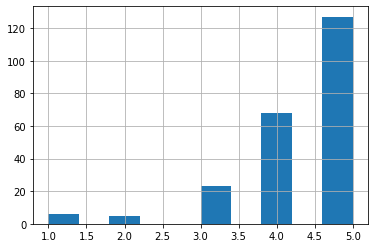

In [39]:
df['rating'].hist()

In [40]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))

In [41]:
df.head()

,date,text,rating,y
0,2021년 10월,아침 일찍 와도 주차장이 여유롭지 않지만 여러가지 기구들도 많고 아이들과 놀기 너무...,5.0,1
1,2021년 10월,"아이들이 좋아하고, 재있어요",5.0,1
2,2021년 10월,가족들과 즐건주말 위드코로나되면 더북적북적 해지겠지?,5.0,1
3,2021년 10월,오후4시에 들어가서 밤 9시 30분까지 알차게 놀았어요^^ 엄청 혼잡하긴 했지만 거...,5.0,1
4,2021년 10월,"유아, 어린이가 놀기에 최고의 놀이공원~",5.0,1


In [42]:
df["y"].value_counts()

1    195
0     34
Name: y, dtype: int64

### Training set / Test set 나누기

In [43]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [44]:
x_train.shape, y_train.shape

((160, 662), (160,))

In [45]:
x_test.shape, y_test.shape

((69, 662), (69,))

### 4-3. 모델 학습
+ Logistic Regression 모델 학습

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [47]:
# 분류 결과 평가
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.84
precision: 0.84
recall: 1.00
F1: 0.91


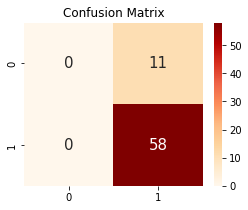

In [48]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [49]:
lr.coef_

array([[ 0.05475546, -0.20576373,  0.22678407,  0.10223653,  0.        ,
         0.05790984,  0.        ,  0.1073085 ,  0.0236738 ,  0.        ,
         0.02692204,  0.04146191,  0.2444119 ,  0.02827921,  0.0113302 ,
         0.03485139,  0.        ,  0.07514593,  0.        ,  0.        ,
         0.        ,  0.04524937,  0.1173064 ,  0.        ,  0.03731972,
        -0.30924109,  0.        ,  0.        ,  0.        , -0.53681491,
         0.        ,  0.        ,  0.02641556, -0.10991461,  0.15750981,
         0.04313695,  0.03564969,  0.02881596,  0.02370762,  0.02370762,
         0.        ,  0.        ,  0.        ,  0.05021873,  0.0173189 ,
         0.0173189 ,  0.03128063,  0.        ,  0.12494886,  0.13369384,
         0.23182213,  0.13582311,  0.06064117,  0.33156088,  0.0113302 ,
         0.03448082,  0.02370762,  0.0113302 ,  0.03485139,  0.        ,
         0.02370762,  0.03042666,  0.03947559,  0.03149747,  0.06343345,
         0.        ,  0.03256492,  0.03089971, -0.2

<BarContainer object of 662 artists>

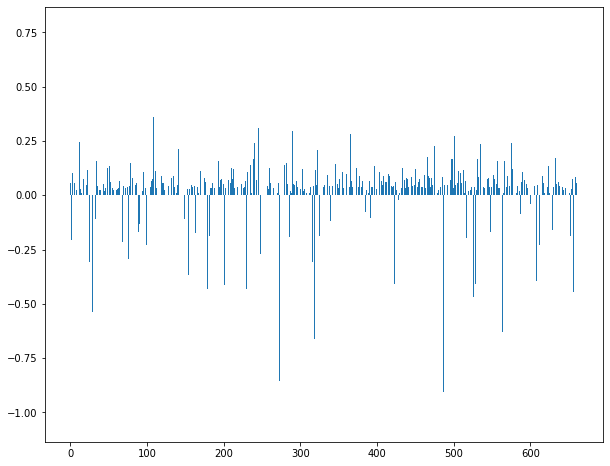

In [50]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [51]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(0.7755827759013286, 345), (0.3617278081589816, 108), (0.33156087725887323, 53), (0.3083069145909406, 245), (0.2935991611376042, 290)]
[(-0.7321522557743866, 84), (-0.7497687779406927, 354), (-0.8568574062652078, 273), (-0.9044120118811126, 487), (-1.0440387418408295, 109)]


In [52]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index

[(0.7755827759013286, 345),
 (0.3617278081589816, 108),
 (0.33156087725887323, 53),
 (0.3083069145909406, 245),
 (0.2935991611376042, 290),
 (0.280821739724434, 365),
 (0.27416044614778706, 501),
 (0.24486947463410633, 507),
 (0.24441190416878159, 12),
 (0.23960088624494344, 575),
 (0.23855034280649157, 240),
 (0.23517106387027786, 535),
 (0.23323971230758214, 169),
 (0.2318221266454537, 50),
 (0.22680717948066775, 475),
 (0.2267840692441908, 2),
 (0.2107415363714001, 141),
 (0.2092874220676995, 322),
 (0.2000763280050048, 417),
 (0.17997781651769554, 110),
 (0.17368330782369046, 466),
 (0.1729293628955843, 633),
 (0.16782071617191205, 497),
 (0.16559935714959848, 531),
 (0.16517644726343433, 498),
 (0.16505286116947684, 239),
 (0.16137593929143904, 131),
 (0.15900467905212193, 193),
 (0.15891383566521167, 566),
 (0.15750981221762533, 34),
 (0.156622124340544, 557),
 (0.15208711430904495, 482),
 (0.1497761243077007, 282),
 (0.1466211772942552, 78),
 (0.14520887944091526, 511),
 (0.1420

In [53]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{347: '아침',
 460: '일찍',
 521: '주차장',
 380: '여러가지',
 84: '기구',
 345: '아이',
 171: '레스토랑',
 145: '돈까스',
 410: '우동',
 76: '그냥',
 215: '무난',
 326: '식당',
 139: '대해',
 507: '조금',
 20: '감독',
 229: '바램',
 12: '가족',
 421: '위드',
 575: '코로나',
 264: '북적',
 638: '해지',
 655: '후시',
 33: '거의',
 210: '모든',
 109: '놀이기구',
 415: '운행',
 88: '기도',
 428: '유아',
 365: '어린이',
 557: '최고',
 108: '놀이',
 53: '공원',
 11: '가을',
 169: '랜드',
 3: '가까이',
 207: '몇몇',
 77: '그대로',
 516: '주막',
 162: '떡뽁이',
 491: '절대',
 559: '최악',
 568: '축제',
 641: '행사',
 239: '버스킹',
 624: '하루',
 555: '총알',
 318: '시간',
 595: '투입',
 634: '함정',
 322: '시설',
 203: '면적',
 15: '각종',
 439: '이벤트',
 320: '시기',
 147: '동문',
 225: '미술',
 58: '관도',
 533: '지하철',
 444: '이용',
 5: '가능',
 290: '서울',
 384: '역사',
 263: '부터',
 563: '추억',
 36: '결혼',
 141: '데리',
 394: '오니',
 90: '기분',
 317: '시각',
 450: '이후',
 605: '편의',
 591: '탑승',
 550: '초등',
 466: '자녀',
 333: '실망',
 240: '번역',
 501: '제공',
 66: '국내',
 560: '최초',
 110: '놀이동산',
 592: '테마',
 601: '파크',
 39: '경품',
 480:

In [54]:
for coef in coef_pos_index[:418]:
    print(invert_index_vectorizer[coef[1]], coef[0])

아이 0.7755827759013286
놀이 0.3617278081589816
공원 0.33156087725887323
별로 0.3083069145909406
서울 0.2935991611376042
어린이 0.280821739724434
제공 0.27416044614778706
조금 0.24486947463410633
가족 0.24441190416878159
코로나 0.23960088624494344
번역 0.23855034280649157
진짜 0.23517106387027786
랜드 0.23323971230758214
공기 0.2318221266454537
장소 0.22680717948066775
가기 0.2267840692441908
데리 0.2107415363714001
시설 0.2092874220676995
원문 0.2000763280050048
놀이동산 0.17997781651769554
자녀 0.17368330782369046
할인 0.1729293628955843
정도 0.16782071617191205
지금 0.16559935714959848
정말 0.16517644726343433
버스킹 0.16505286116947684
대기 0.16137593929143904
맛집 0.15900467905212193
추천 0.15891383566521167
걱정 0.15750981221762533
최고 0.156622124340544
저학년 0.15208711430904495
산책 0.1497761243077007
근교 0.1466211772942552
종일 0.14520887944091526
아들 0.142021789527178
아주 0.14165122651668735
방문 0.1404339977928652
사진 0.13829894945451005
공룡 0.1358231059869309
오전 0.13566352641124993
공간 0.13369384144481963
타고 0.13358117753996612
하루 0.1321046156026608
십상 

In [55]:
for coef in coef_neg_index[:69]:
    print(invert_index_vectorizer[coef[1]], coef[0])

놀이기구 -1.0440387418408295
전부 -0.9044120118811126
사람 -0.8568574062652078
알바생 -0.7497687779406927
기구 -0.7321522557743866
시간 -0.661108097312605
추움 -0.6317832292560738
입장료 -0.5680647943815282
나들이 -0.55415562073166
개정 -0.5368149128446152
중단 -0.4681724452738168
운용 -0.45248932079729975
패스 -0.45097201741414805
휴가 -0.4432635843743359
리뉴얼좀 -0.4338228876625431
바랬는데 -0.4338228876625431
멀미 -0.4119789820251767
위주 -0.4077870195801625
중인 -0.4077870195801625
평일 -0.39663913388683186
동안 -0.36724330615943035
개월 -0.30924109245361325
슬픔 -0.30924109245361325
루나 -0.30064801160943205
장점 -0.2925451013055517
그냥 -0.29148405020947266
이벤트 -0.2790236190035075
저녁 -0.27799710084592766
보수 -0.27063905251380355
다가 -0.2657502497914553
천원 -0.2657502497914553
나중 -0.2298548154040295
포장 -0.2298548154040295
안해 -0.22819188189834863
국민카드 -0.21363215071546865
음식점 -0.21363215071546865
주차장 -0.20885773143606784
가격 -0.20576373226581665
주말 -0.19724336382838448
운영 -0.19400572095638816
생각 -0.19030198239432697
그게 -0.18746722731996834
린네 -